# Chapter03 Intensity Transformation And Spatial Filtering

In [1]:
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2

import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

resourcePath = './res/DIP3E_Original_Images_CH03/'

im = cv.imread(resourcePath + 'Fig0354(a)(einstein_orig).tif', cv.IMREAD_GRAYSCALE)
plt.imshow(im, 'gray'),plt.title('Original')
plt.show()

<Figure size 640x480 with 1 Axes>

## Linear mapping

this was implemented using imadjust in matlab

In [2]:
# Todo imadust, stretchlim

## Complement grayscale image

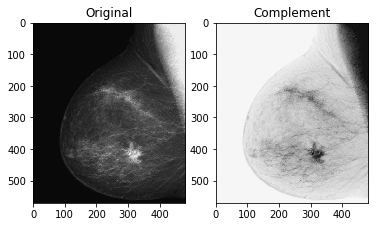

In [10]:
im = cv.imread(resourcePath + 'Fig0304(a)(breast_digital_Xray).tif', cv.IMREAD_GRAYSCALE)
imcomp = cv.bitwise_not(im)

plt.subplot(121),plt.imshow(im, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(imcomp, 'gray'),plt.title('Complement')
plt.show()

## Logarithmic and Contrast-Stretching Transformations

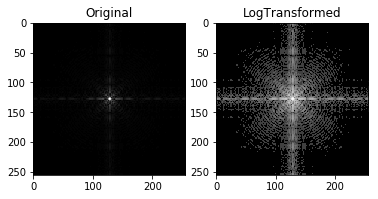

In [4]:
im = cv.imread(resourcePath + 'Fig0305(a)(DFT_no_log).tif', cv.IMREAD_GRAYSCALE)

g = np.log(1 + np.float32(im))
plt.subplot(121),plt.imshow(im, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(g, 'gray'),plt.title('LogTransformed')
plt.show()

In [5]:
#Todo interpl, intrans

## Histogram Processing

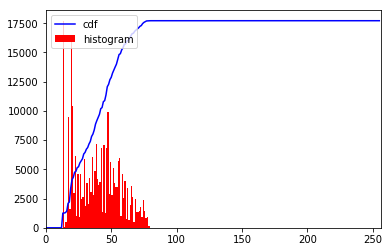

In [6]:
im = cv.imread(resourcePath + 'Fig0316(4)(bottom_left).tif', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist(im, [0], None, [256], [0,256])
#plt.hist(im.ravel(), 256, [0, 256]); plt.show()

hist,bins = np.histogram(im.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(im.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Histogram Equalization

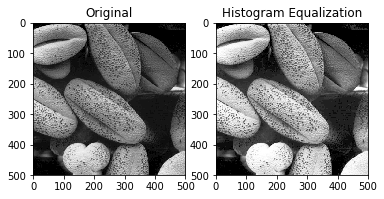

In [7]:
imhisteq = cv.equalizeHist(im)

plt.subplot(121),plt.imshow(im, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(imhisteq, 'gray'),plt.title('Histogram Equalization')
plt.show()

## Contrast Limited Adaptive Histogram Equalization

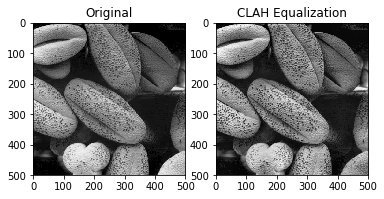

In [8]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
imclahe = clahe.apply(im)

plt.subplot(121),plt.imshow(im, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(imclahe, 'gray'),plt.title('CLAH Equalization')
plt.show()

## Spatial Filtering

### Linear Spatial Filtering

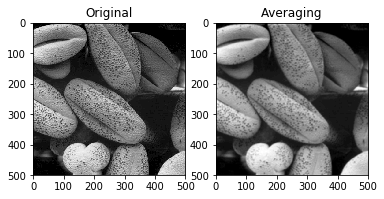

In [9]:
kernel = np.ones((5,5),np.float32) / 25
dst = cv.filter2D(im, -1, kernel)

plt.subplot(121),plt.imshow(im, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(dst, 'gray'),plt.title('Averaging')
plt.show()

In [10]:
# Todo: imfilter equals in opencv.
# @see https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html to more info

### Linear Spatial Filtering - Median

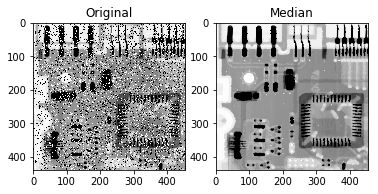

In [11]:
image = cv.imread(resourcePath + 'Fig0335(a)(ckt_board_saltpep_prob_pt05).tif', cv.IMREAD_GRAYSCALE)
medianImage = cv.medianBlur(image, 5)

plt.subplot(121),plt.imshow(image, 'gray'),plt.title('Original')
plt.subplot(122),plt.imshow(medianImage, 'gray'),plt.title('Median')
plt.show()

## Sharpening Spatial Filters

### Image Sharpening Using The Laplacian

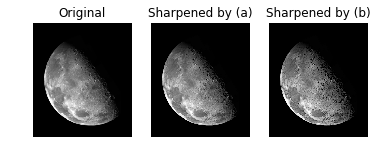

In [2]:
moon_img = cv.imread(resourcePath + 'Fig0338(a)(blurry_moon).tif', cv.IMREAD_GRAYSCALE)

# Masks from FIGURE 3.37
mask_a = np.array([[0,1,0],  # The Mask from Eq 3.6-6
                 [1,-4,1],
                 [0,1,0]])

mask_b = np.array([[1,1,1],  # The Mask from Eq 3.6-6 with diagonal terms
                 [1,-8,1],
                 [1,1,1]])

# Create Laplacian Matrices from original image
lap_a = cv.filter2D(moon_img,-1,mask_a)
lap_b = cv.filter2D(moon_img,-1,mask_b)

c = -1  # Sharpening constant (must be negative)

# Eq 3.6-7
res_a = moon_img+(c*lap_a)
res_b = moon_img+(c*lap_b)

# Normalize values to [0,255]
res_a = np.clip(res_a,0,255)
res_b = np.clip(res_b,0,255)

plt.subplot(131),plt.imshow(moon_img,cmap = 'gray'),plt.title('Original'),plt.axis('off')
plt.subplot(132),plt.imshow(res_a,cmap = 'gray'),plt.title('Sharpened by (a)'),plt.axis('off')
plt.subplot(133),plt.imshow(res_b,cmap = 'gray'),plt.title('Sharpened by (b)'),plt.axis('off')

plt.show()